<a href="https://colab.research.google.com/github/HHL43/Generative-AI-HW/blob/main/AI_hw08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 使用 Gradio 製作一個財經小幫手並且實現 Chain-of-Thought（CoT）推理過程


1. 第一階段（思考階段）
用戶輸入一個財經事件（例如：企業併購、政策變動、股市波動等）。

系統將從正面與反面兩個角度分析這個事件對市場或公司的影響，並列出幾個可能的原因或影響因素。

2. 第二階段（產文階段）
根據思考階段的分析，選擇最具影響力的理由，並推測未來可能的走勢。

系統會生成一段簡潔的財經預測文章，來預測該事件可能帶來的後續變化。


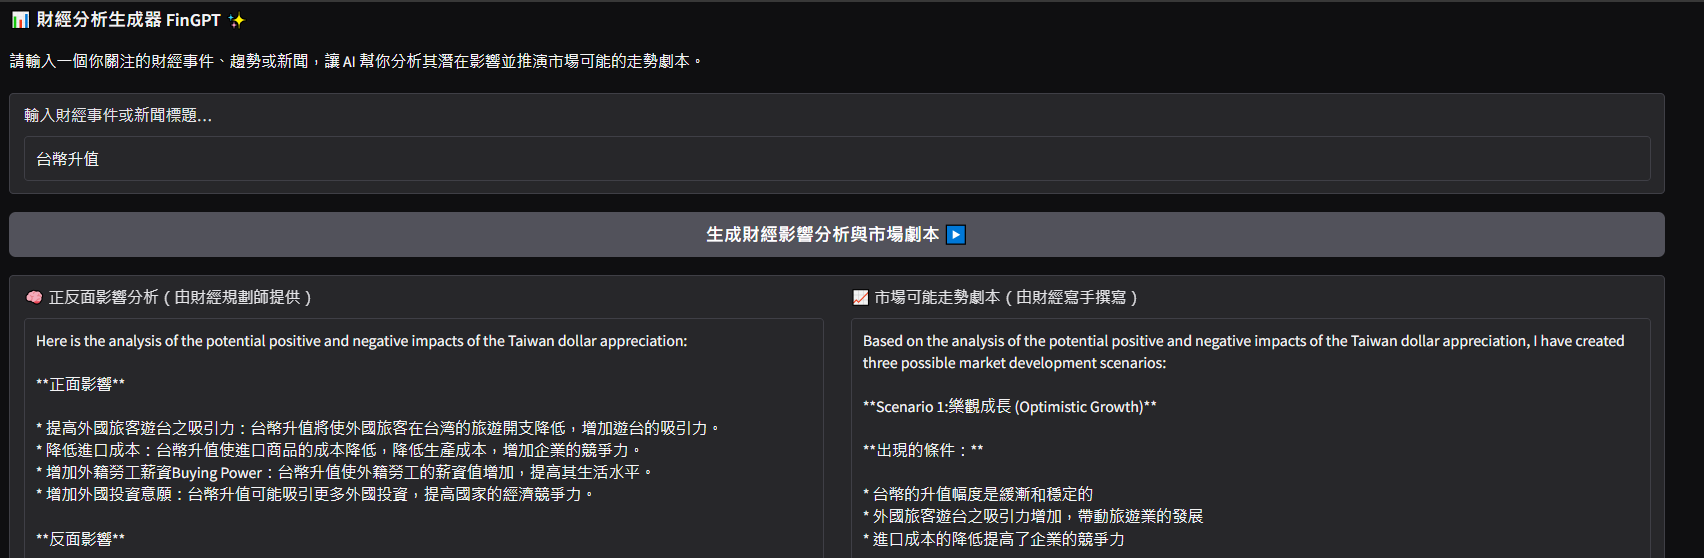

In [6]:
import os
from google.colab import userdata
!pip install aisuite[all]
import aisuite as ai
!pip install gradio
import gradio as gr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.7/322.7 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.1 MB/s eta 0:00:00


In [17]:
api_key = userdata.get('Groq')
os.environ['GROQ_API_KEY']=api_key
provider = "groq"
model = "llama3-70b-8192"

provider_planner = "groq"
model_planner="llama3-70b-8192"

provider_writer = "groq"
model_writer = "llama3-70b-8192"

In [13]:
def reply(system="用繁體中文回答",
          prompt="Hi",
          provider= provider,
          model= model
          ):

    client = ai.Client()

    messages = [
        {"role": "system", "content": system},
        {"role": "user", "content": prompt}
    ]


    response = client.chat.completions.create(model=f"{provider}:{model}", messages=messages)

    return response.choices[0].message.content

In [8]:
system_planner =  """
你是一位財經分析規劃師。針對使用者提出的財經事件，請列出事件可能造成的幾項正面影響與反面影響。
這些影響可來自政策、市場反應、產業動能、外部經濟情勢等因素。
請注意：
- 只需要列出潛在的正面與反面影響，**不需要分析未來市場走勢**。
- 每個影響請簡短說明原因。
請使用繁體中文，以條列式清楚呈現「正面影響」與「反面影響」兩大區塊。
"""

system_writer = """
你是一位專業的財經分析師。根據提供的「正面影響」與「反面影響」，撰寫出 2～3 種市場可能發展的劇本（scenario）。

每種劇本請包含以下要素：
1. 情境名稱（例如：樂觀成長、維持盤整、下行壓力）
2. 出現的條件（根據哪些正反面影響成真）
3. 市場的可能反應與走勢預測（例如股市、利率、匯率、產業趨勢）

請使用繁體中文撰寫，條理清晰、邏輯合理，協助讀者掌握各種可能情境。
"""

In [9]:
def financial_post(prompt):
    # Step 1: 分析正反面潛在影響（由 planner 模型產出）
    planning_prompt = f"使用者說：{prompt}。請分析此事件可能帶來的正面影響與反面影響。"
    impact_analysis = reply(system_planner, planning_prompt, provider=provider_planner, model=model_planner)

    # Step 2: 根據正反面影響，撰寫 2～3 種市場走勢劇本（由 writer 模型產出）
    generation_prompt = f"這是此事件的正反面影響分析：\n{impact_analysis}\n\n請根據這些資訊，撰寫出兩到三種可能的市場發展劇本，每種情境需說明條件與可能的市場反應。"
    final_scenarios = reply(system_writer, generation_prompt, provider=provider_writer, model=model_writer)

    return impact_analysis, final_scenarios

In [19]:
with gr.Blocks() as demo:
    gr.Markdown("### 📊 財經分析生成器 FinGPT ✨")
    gr.Markdown("請輸入一個你關注的財經事件、趨勢或新聞，讓 AI 幫你分析其潛在影響並推演市場可能的走勢劇本。")

    user_input = gr.Textbox(label="輸入財經事件或新聞標題…")
    btn = gr.Button("生成財經影響分析與市場劇本 ▶️")

    with gr.Row():
        out1 = gr.Textbox(label="🧠 正反面影響分析（由財經規劃師提供）")
        out2 = gr.Textbox(label="📈 市場可能走勢劇本（由財經寫手撰寫）")

    btn.click(financial_post, inputs=[user_input], outputs=[out1, out2])


In [20]:
demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://6800035ee8fc5cf5e1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://6800035ee8fc5cf5e1.gradio.live
